In [1]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
tf.__version__

'2.9.0'

GradientTape
The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [2]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

Train our model

In [8]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.01

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(800)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=8.84 b=9.54, loss=569.43909
Epoch  2: w=7.82 b=9.12, loss=454.26303
Epoch  3: w=6.91 b=8.75, loss=363.51962
Epoch  4: w=6.11 b=8.40, loss=292.00122
Epoch  5: w=5.41 b=8.09, loss=235.61072
Epoch  6: w=4.78 b=7.81, loss=191.12463
Epoch  7: w=4.23 b=7.55, loss=156.00688
Epoch  8: w=3.74 b=7.31, loss=128.26210
Epoch  9: w=3.31 b=7.09, loss=106.32039
Epoch 10: w=2.94 b=6.89, loss=88.94658
Epoch 11: w=2.60 b=6.71, loss=75.16885
Epoch 12: w=2.31 b=6.53, loss=64.22261
Epoch 13: w=2.05 b=6.37, loss=55.50621
Epoch 14: w=1.82 b=6.22, loss=48.54631
Epoch 15: w=1.63 b=6.09, loss=42.97041
Epoch 16: w=1.45 b=5.95, loss=38.48546
Epoch 17: w=1.30 b=5.83, loss=34.86082
Epoch 18: w=1.17 b=5.72, loss=31.91500
Epoch 19: w=1.05 b=5.61, loss=29.50518
Epoch 20: w=0.95 b=5.50, loss=27.51896
Epoch 21: w=0.86 b=5.40, loss=25.86785
Epoch 22: w=0.79 b=5.31, loss=24.48221
Epoch 23: w=0.73 b=5.22, loss=23.30721
Epoch 24: w=0.67 b=5.13, loss=22.29968
Epoch 25: w=0

Epoch 222: w=1.75 b=-0.24, loss=0.33067
Epoch 223: w=1.76 b=-0.25, loss=0.32388
Epoch 224: w=1.76 b=-0.25, loss=0.31722
Epoch 225: w=1.76 b=-0.26, loss=0.31071
Epoch 226: w=1.76 b=-0.27, loss=0.30432
Epoch 227: w=1.77 b=-0.28, loss=0.29807
Epoch 228: w=1.77 b=-0.28, loss=0.29195
Epoch 229: w=1.77 b=-0.29, loss=0.28595
Epoch 230: w=1.77 b=-0.30, loss=0.28008
Epoch 231: w=1.78 b=-0.31, loss=0.27433
Epoch 232: w=1.78 b=-0.31, loss=0.26869
Epoch 233: w=1.78 b=-0.32, loss=0.26317
Epoch 234: w=1.78 b=-0.33, loss=0.25777
Epoch 235: w=1.79 b=-0.33, loss=0.25247
Epoch 236: w=1.79 b=-0.34, loss=0.24729
Epoch 237: w=1.79 b=-0.35, loss=0.24221
Epoch 238: w=1.79 b=-0.35, loss=0.23723
Epoch 239: w=1.79 b=-0.36, loss=0.23236
Epoch 240: w=1.80 b=-0.37, loss=0.22759
Epoch 241: w=1.80 b=-0.37, loss=0.22291
Epoch 242: w=1.80 b=-0.38, loss=0.21833
Epoch 243: w=1.80 b=-0.39, loss=0.21385
Epoch 244: w=1.80 b=-0.39, loss=0.20946
Epoch 245: w=1.81 b=-0.40, loss=0.20515
Epoch 246: w=1.81 b=-0.41, loss=0.20094


Epoch 444: w=1.98 b=-0.92, loss=0.00330
Epoch 445: w=1.98 b=-0.92, loss=0.00323
Epoch 446: w=1.98 b=-0.93, loss=0.00316
Epoch 447: w=1.98 b=-0.93, loss=0.00310
Epoch 448: w=1.98 b=-0.93, loss=0.00304
Epoch 449: w=1.98 b=-0.93, loss=0.00297
Epoch 450: w=1.98 b=-0.93, loss=0.00291
Epoch 451: w=1.98 b=-0.93, loss=0.00285
Epoch 452: w=1.98 b=-0.93, loss=0.00279
Epoch 453: w=1.98 b=-0.93, loss=0.00274
Epoch 454: w=1.98 b=-0.93, loss=0.00268
Epoch 455: w=1.98 b=-0.93, loss=0.00263
Epoch 456: w=1.98 b=-0.93, loss=0.00257
Epoch 457: w=1.98 b=-0.93, loss=0.00252
Epoch 458: w=1.98 b=-0.93, loss=0.00247
Epoch 459: w=1.98 b=-0.93, loss=0.00242
Epoch 460: w=1.98 b=-0.94, loss=0.00237
Epoch 461: w=1.98 b=-0.94, loss=0.00232
Epoch 462: w=1.98 b=-0.94, loss=0.00227
Epoch 463: w=1.98 b=-0.94, loss=0.00222
Epoch 464: w=1.98 b=-0.94, loss=0.00218
Epoch 465: w=1.98 b=-0.94, loss=0.00213
Epoch 466: w=1.98 b=-0.94, loss=0.00209
Epoch 467: w=1.98 b=-0.94, loss=0.00205
Epoch 468: w=1.98 b=-0.94, loss=0.00200


Epoch 661: w=2.00 b=-0.99, loss=0.00004
Epoch 662: w=2.00 b=-0.99, loss=0.00004
Epoch 663: w=2.00 b=-0.99, loss=0.00004
Epoch 664: w=2.00 b=-0.99, loss=0.00003
Epoch 665: w=2.00 b=-0.99, loss=0.00003
Epoch 666: w=2.00 b=-0.99, loss=0.00003
Epoch 667: w=2.00 b=-0.99, loss=0.00003
Epoch 668: w=2.00 b=-0.99, loss=0.00003
Epoch 669: w=2.00 b=-0.99, loss=0.00003
Epoch 670: w=2.00 b=-0.99, loss=0.00003
Epoch 671: w=2.00 b=-0.99, loss=0.00003
Epoch 672: w=2.00 b=-0.99, loss=0.00003
Epoch 673: w=2.00 b=-0.99, loss=0.00003
Epoch 674: w=2.00 b=-0.99, loss=0.00003
Epoch 675: w=2.00 b=-0.99, loss=0.00003
Epoch 676: w=2.00 b=-0.99, loss=0.00003
Epoch 677: w=2.00 b=-0.99, loss=0.00003
Epoch 678: w=2.00 b=-0.99, loss=0.00003
Epoch 679: w=2.00 b=-0.99, loss=0.00003
Epoch 680: w=2.00 b=-0.99, loss=0.00002
Epoch 681: w=2.00 b=-0.99, loss=0.00002
Epoch 682: w=2.00 b=-0.99, loss=0.00002
Epoch 683: w=2.00 b=-0.99, loss=0.00002
Epoch 684: w=2.00 b=-0.99, loss=0.00002
Epoch 685: w=2.00 b=-0.99, loss=0.00002


Plot our trained values over time

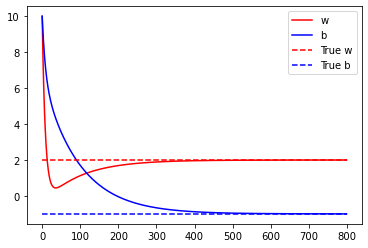

In [9]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()